# Importing Libraries

In [4]:
from scipy.io import loadmat, savemat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import random

In [5]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])
# print(os.environ['SHELL'])


KeyError: 'CONDA_DEFAULT_ENV'

# Loading Data

Select the dataset you want to work with by setting the variable 'dataset_name'

In [8]:
def read_HSI(dataset):
    if dataset == 'Salinas':
        X = loadmat('../Datasets/Salinas/Salinas_corrected.mat')['salinas_corrected']
        y = loadmat('../Datasets/Salinas/Salinas_gt.mat')['salinas_gt']
        print(f"X shape: {X.shape}\ny shape: {y.shape}")
        return X, y
    elif dataset == 'IndianPines':
        X = loadmat('../Datasets/IndianPines/Indian_pines_corrected.mat')['indian_pines_corrected']
        y = loadmat('../Datasets/IndianPines/Indian_pines_gt.mat')['indian_pines_gt']
        print(f"X shape: {X.shape}\ny shape: {y.shape}")
        return X, y
    
dataset_name = 'IndianPines'
# dataset_name = 'Salinas'
X, y = read_HSI(dataset=dataset_name)

if dataset_name == 'Salinas':
    class_names = ['Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow',
                    'Fallow_rough_plow','Fallow_smooth','Stubble','Celery',
                    'Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green',
                    'Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk',
                    'Lettuce_romaine_7wk','Vinyard_untrained','Vinyard_vertical']
elif dataset_name == 'IndianPines':
    class_name = [ "Alfalfa", "Corn-notill", "Corn-mintill","Corn", "Grass-pasture", 
                    "Grass-trees","Grass-pasture-mowed", "Hay-windrowed", "Oats",
                    "Soybean-notill", "Soybean-mintill", "Soybean-clean","Wheat",
                    "Woods", "Buildings-Grass-Trees-Drives","Stone-Steel-Towers"]
    


X shape: (145, 145, 200)
y shape: (145, 145)


# Visualizing Dataset

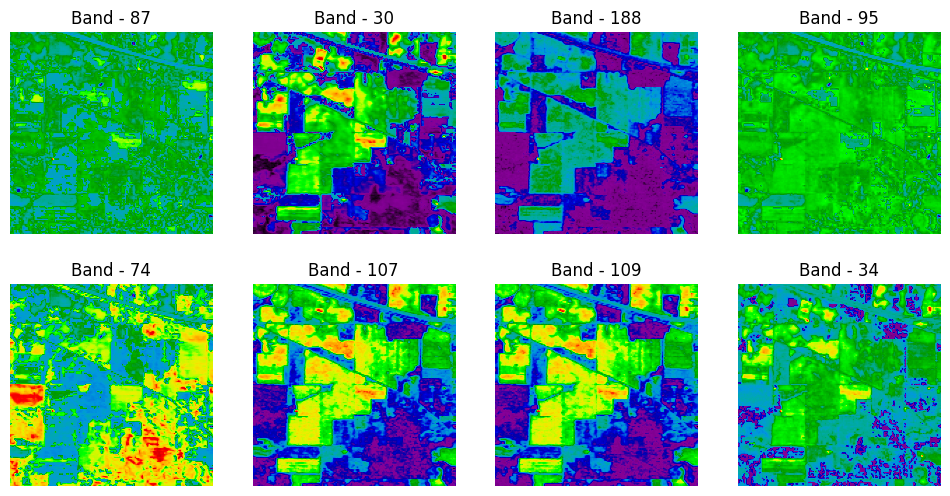

In [9]:
#Spectral bands

fig = plt.figure(figsize = (12, 6))

for i in range(1, 8+1):
    fig.add_subplot(2,4, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


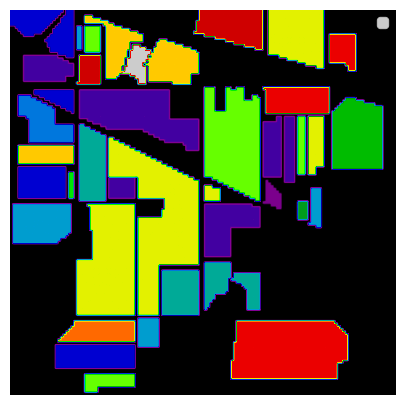

In [10]:
# Ground Truth

plt.figure(figsize=(10, 5))
plt.imshow(y, cmap='nipy_spectral')
# plt.colorbar
plt.legend()
plt.axis('off')
plt.show()

In [11]:
def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  # df.to_csv(f'./Datasets/Raw/{dataset_name}/{dataset_name}.csv')
  return df

df = extract_pixels(X, y)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [12]:
df.iloc[:, :-1].describe()

band1         band2         band3         band4         band5  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    2957.363472   4091.321237   4277.502259   4169.956671   4516.678668   
std      354.918708    230.390005    257.827640    280.761254    346.035984   
min     2560.000000   2709.000000   3649.000000   2810.000000   3840.000000   
25%     2602.000000   3889.000000   4066.000000   3954.000000   4214.000000   
50%     2780.000000   4106.000000   4237.000000   4126.000000   4478.000000   
75%     3179.000000   4247.000000   4479.000000   4350.000000   4772.000000   
max     4536.000000   5744.000000   6361.000000   6362.000000   7153.000000   

              band6         band7         band8         band9        band10  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    4790.595149   4848.317574   4714.732509   4668.904828   4439.065541   
std      414.382138    469.247667    491.728349    533.232855    539.908195   
min     4056.000000   4004.000000   3865.000000   3775.000000   2792.000000   
25%     4425.000000   4421.000000   4263.000000   4173.000000   3940.000000   
50%     4754.000000   4808.000000   4666.000000   4632.000000   4404.000000   
75%     5093.000000   5198.000000   5100.000000   5084.000000   4860.000000   
max     7980.000000   8284.000000   8128.000000   8194.000000   7928.000000   

       ...       band191       band192       band193       band194  \
count  ...  21025.000000  21025.000000  21025.000000  21025.000000   
mean   ...   1079.310773   1061.927848   1060.210273   1063.276813   
std    ...     49.943791     38.843805     38.712195     41.920969   
min    ...    998.000000    998.000000    999.000000    999.000000   
25%    ...   1031.000000   1026.000000   1024.000000   1024.000000   
50%    ...   1068.000000   1053.000000   1052.000000   1054.000000   
75%    ...   1129.000000   1099.000000   1098.000000   1104.000000   
max    ...   1364.000000   1287.000000   1289.000000   1315.000000   

            band195       band196       band197       band198       band199  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    1050.048514   1040.201141   1043.370321   1030.194816   1015.571463   
std       34.242725     26.452672     29.794418     20.865106     11.386402   
min      993.000000    990.000000    992.000000    989.000000    986.000000   
25%     1019.000000   1016.000000   1016.000000   1012.000000   1006.000000   
50%     1043.000000   1033.000000   1035.000000   1026.000000   1014.000000   
75%     1083.000000   1066.000000   1072.000000   1050.000000   1024.000000   
max     1258.000000   1201.000000   1245.000000   1167.000000   1076.000000   

            band200  
count  21025.000000  
mean    1008.513579  
std        7.050921  
min      981.000000  
25%     1004.000000  
50%     1009.000000  
75%     1014.000000  
max     1036.000000  

[8 rows x 200 columns]

# Dimensionality Reduction

In [13]:
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA


def show_random_bands(df_dr):
    fig = plt.figure(figsize = (20, 10))

    random_bands = random.sample(range(1, df_dr.shape[1]), 8)
    for i in range(1, 8+1):
        fig.add_subplot(2,4, i)
        plt.imshow(df_dr.loc[:, f'Band-{random_bands[i-1]}'].values.reshape(y.shape[0], y.shape[1]), cmap='nipy_spectral')
        plt.axis('off')
        plt.title(f'Band - {random_bands[i-1]}')

def apply_DR(method, n_components):
    if method == 'PCA':
        pca = PCA(n_components = n_components, random_state=0)
        dt = pca.fit_transform(df.iloc[:, :-1].values)
    elif method == 'FastICA':
        fast_ica = FastICA(n_components=n_components,
         random_state=0,
         whiten='unit-variance',
         max_iter=400)
        dt = fast_ica.fit_transform(df.iloc[:, :-1].values)
    dr_df = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
    dr_df.columns = [f'Band-{i}' for i in range(1,n_components+1)]+['class']

    dr_df.head()
    return dr_df

## PCA

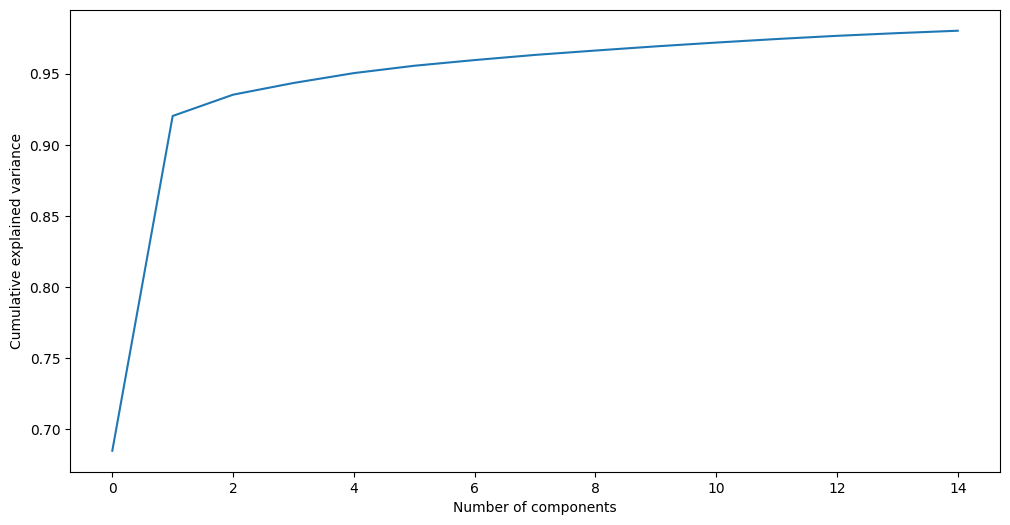

In [14]:

pca = PCA(n_components = 15) #initial test

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


In [21]:
n_components = 30

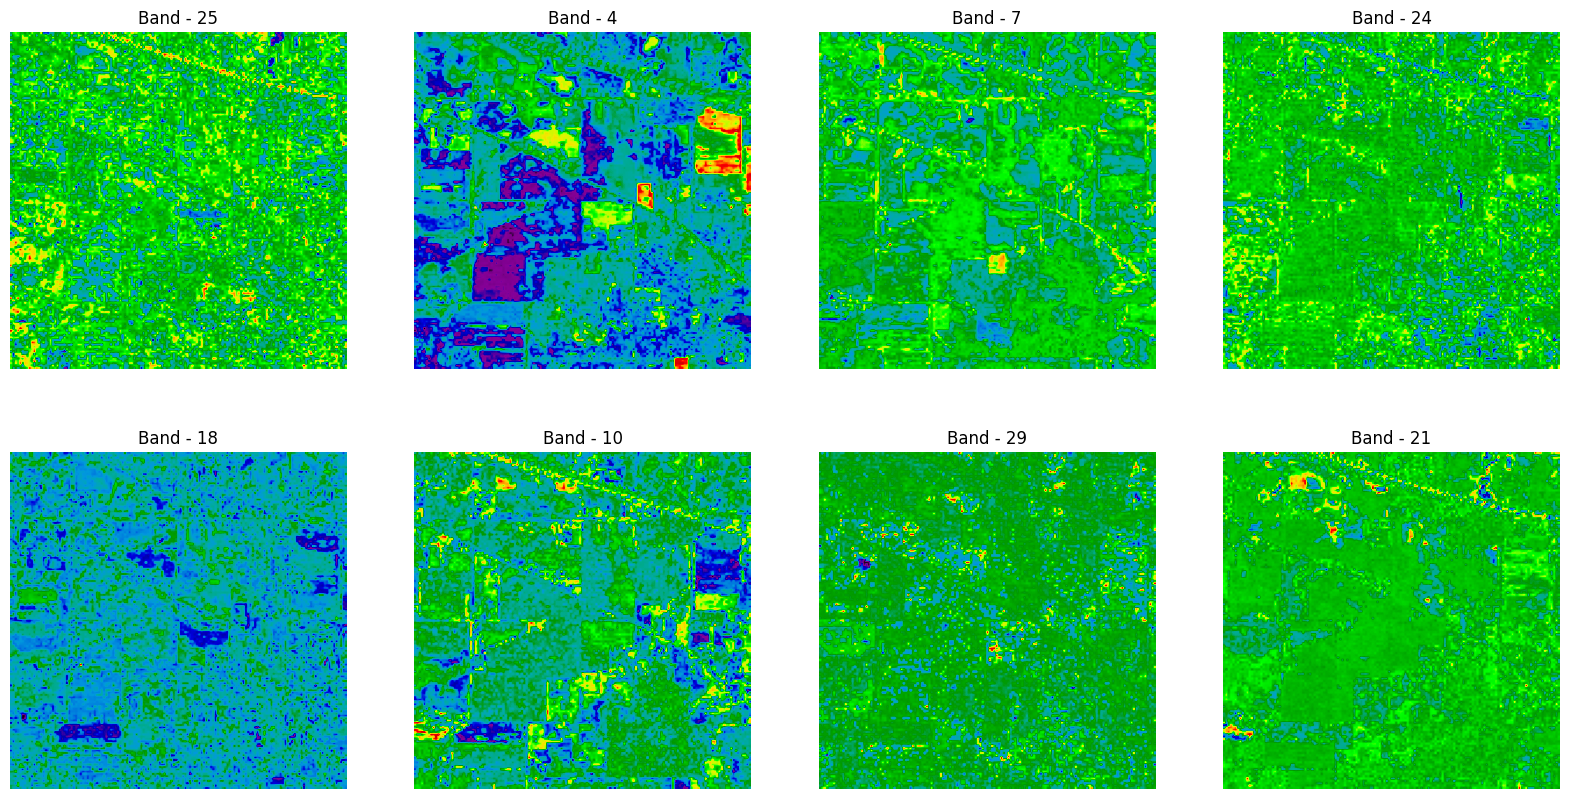

In [22]:
dr_df = apply_DR(method='PCA', n_components=n_components)
show_random_bands(dr_df)

# saving to .mat
reshaped_data = np.array([row[1][:-1] for row in dr_df.iterrows()]).reshape((X.shape[0], X.shape[1], n_components))
savemat(f'../Datasets/{dataset_name}/{dataset_name}_PCA_{n_components}.mat', {'data': reshaped_data})

## FastICA

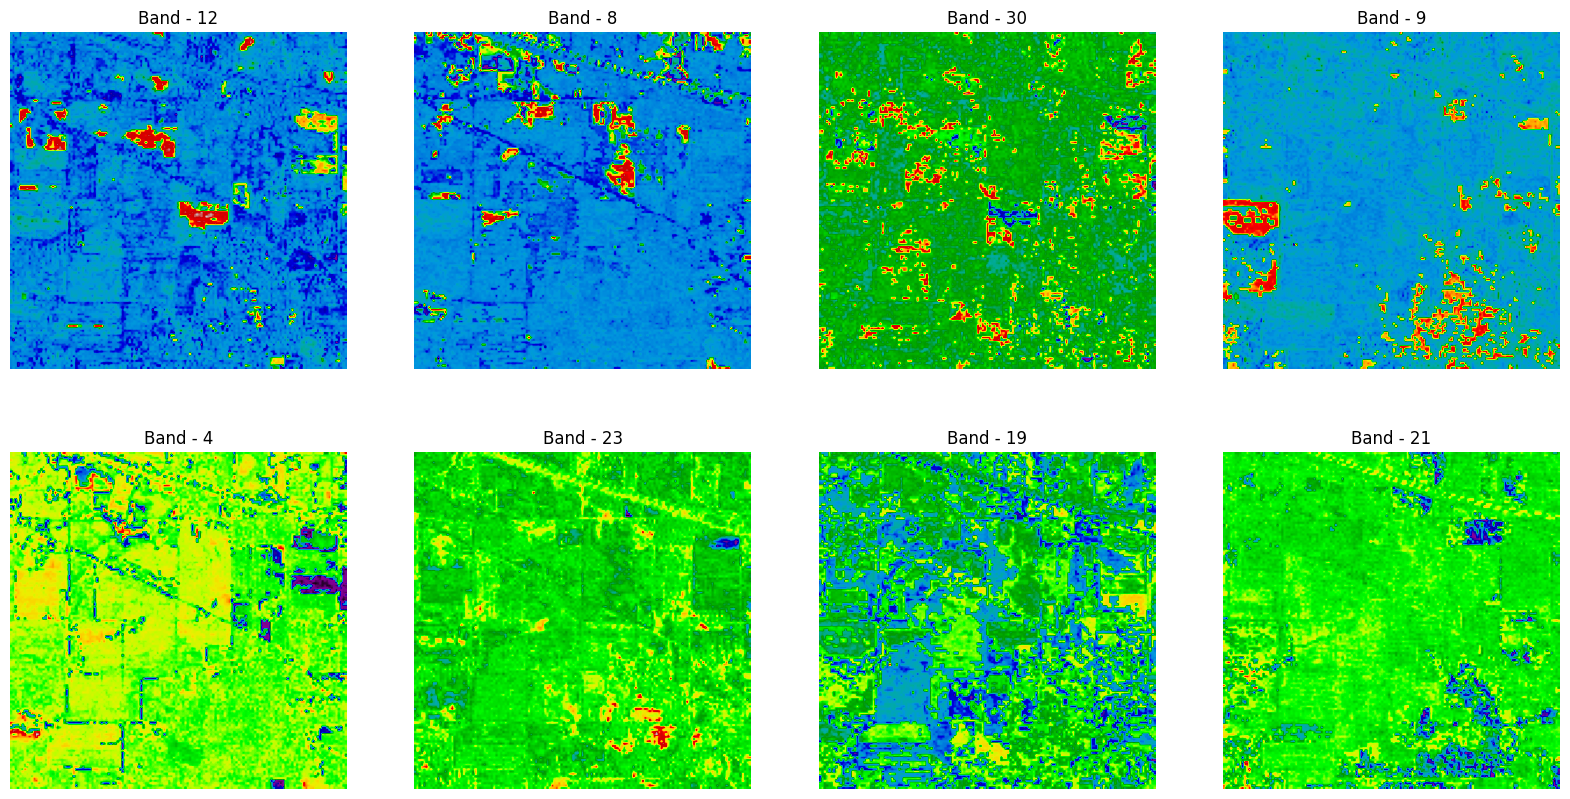

In [23]:
dr_df = apply_DR(method='FastICA', n_components=n_components)
show_random_bands(dr_df)

# saving to .mat
reshaped_data = np.array([row[1][:-1] for row in dr_df.iterrows()]).reshape((X.shape[0], X.shape[1], n_components))
savemat(f'../Datasets/{dataset_name}/{dataset_name}_FastICA_{n_components}.mat', {'data': reshaped_data})